# Exoplanets

An exoplanet is a planet that orbits around stars that are outside our Solar System. Studying exoplanets let astronomers to understand better our own planet, and how the universe is composed. 

## Methods

Because planets do not have nuclear fusion like the stars, they don't emit any radiation. Instead, they shine with light reflected from a star. In order to detect them, astronomers have to look at the effects these planets have on the star they orbit. 

The most common methods are transit and radial velocity.

#### Transit Method

A planet passing in front of its star, it is called a transit. When this happens, the planet will block out a tiny part of the star's light. This will cause a less bright star. If the transit is detected at regular intervals and fixed lenght of time, it is probably being caused by a planet. By observing the star during the transit, astronomer can infer some charateristics of the planet, like the size and the distance between the planet form its star. 


#### Radial Velocity 

This method uses the fact that a star that is being orbited by a planet is not stationary. In other words, the planet and the star orbit around each other. Since the star has more mass, the star appears to move in small circle or ellipse. This movements can be observed in the spectrum of the star, if the star moves towards us the light will appear blueshifted and if it is moving away will be redshifted. 

## Habitable Zone

The habitable zone is the region sorrounding the star that it allows the presence of water in its liquid state over the surface of the planet. 

The importance of liquid water to all life on Earth is the reason why astronomers are looking for extraterrestrial life in those planets, based on the hypothesis that we all need water. The first rocky exoplanets in the habitable zone where find through the Kepler's telescope. 

## Are we alone in the universe?

This question resonates in us. I believe our universe is so immense, that the possibility that we are the only living form seems absurd. The quest of finding extraterrestrial life is not only to prepare us for what is out there; at the same time is the quest to understand ourselves better. Humans have observed the universe not only to survive, but to understand better our place in it. 


## Data

The data about the exoplanets that is being used in this notebook can be found in:

http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database

For this exploratory data analysis, I used only a subset of the variables. The dataset used can be found in this repository.

## Exploratory Data Analysis

In [113]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Reading the file
exoplanet = pd.read_csv("/Users/azucenamv/Documents/MIDS/ML/ids705/assignments/data/phl_hec_all_confirmed_revised.csv",error_bad_lines=False)

In [66]:
# Removing NA's 
exoplanet.dropna(inplace=True)
exoplanet.shape

(3632, 34)

In [67]:
# Formating
exoplanet.columns = exoplanet.columns.str.replace('[^a-zA-z]', '')
exoplanet['PDiscMethod'] = exoplanet['PDiscMethod'].str.lower()
exoplanet['PDiscMethod'] = exoplanet['PDiscMethod'].replace('primary transit','transit')

In [68]:
exoplanet.head()

,PName,PZoneClass,PMassClass,PCompositionClass,PAtmosphereClass,PHabitableClass,PMassEU,PRadiusEU,PDensityEU,PGravityEU,...,SHabZoneMinAU,SHabZoneMaxAU,PHZD,PHZC,PHZA,PHZI,PHabitable,PConfirmed,PDiscMethod,PDiscYear
1,1SWASP J1407 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,6358.80,10.94,4.86,53.12,...,0.461,1.143,9.07,15.30,45.41,0.02,0,1,transit,2012
6,2M 0746+20 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,9538.20,10.86,7.44,80.81,...,0.011,0.029,325.42,20.19,132.41,0.00,0,1,imaging,2010
9,2M 2140+16 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,6358.80,10.30,5.81,59.89,...,0.013,0.035,316.89,14.27,113.50,0.00,0,1,imaging,2010
10,2M 2206-20 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,9538.20,14.56,3.09,44.99,...,0.015,0.041,347.42,27.82,121.07,0.00,0,1,imaging,2010
17,4 Uma b,Hot,Jovian,gas,hydrogen-rich,non-habitable,2257.37,11.67,1.42,16.57,...,8.480,21.034,-2.21,10.03,7.06,0.07,0,1,radial velocity,2007


First, let's try to see what is the most popular method of discovering planets.

In [70]:
method = exoplanet.PDiscMethod.value_counts()

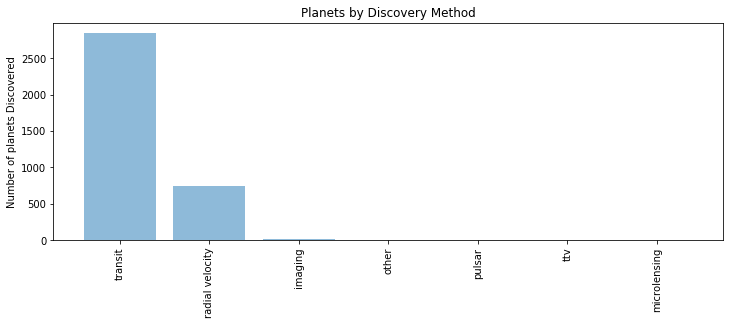

In [71]:
plt.figure(figsize=(12, 4))
plt.bar(method.index, method.values, align='center', alpha=0.5)
plt.xticks(method.index, rotation='vertical')
plt.ylabel('Number of Planets Discovered')
plt.title('Planets by Discovery Method')
plt.show()

We can see that the most popular method is transit and the second one is radial velocity.
Is that method also the most popular among habitable exoplanets?

In [72]:
# Creating a dataframe of habitable planets
exoplanet_hab = exoplanet[exoplanet['PHabitableClass']!='non-habitable']
method_hab = exoplanet_hab.PDiscMethod.value_counts()

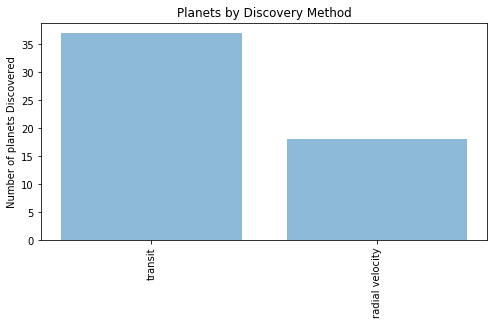

In [73]:
plt.figure(figsize=(8, 4))
plt.bar(method_hab.index, method_hab.values, align='center', alpha=0.5)
plt.xticks(method_hab.index, rotation='vertical')
plt.ylabel('Number of Planets Discovered')
plt.title('Planets by Discovery Method')
plt.show()

Only two methods were able to detect exoplanets: transit and radial velocity. It would be interesting to know why the other two methods have not been able to dectect any of them.

Another assumption is that over time, it might be easier for astronomers to find new planets. Let's try to see the trends.

In [78]:
year = exoplanet.PDiscYear.value_counts()
year_hab = exoplanet_hab.PDiscYear.value_counts()

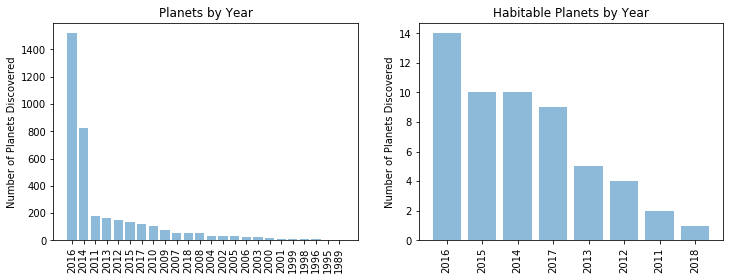

In [77]:
plt.figure(1,figsize=(12, 4))
plt.subplot(1,2,1)
plt.bar(year.index, year.values, align='center', alpha=0.5)
plt.xticks(year.index, rotation='vertical')
plt.ylabel('Number of Planets Discovered')
plt.title('Planets by Year')

plt.subplot(1,2,2)
plt.bar(year_hab.index, year_hab.values, align='center', alpha=0.5)
plt.xticks(year_hab.index, rotation='vertical')
plt.ylabel('Number of Planets Discovered')
plt.title('Habitable Planets by Year')

plt.show()

Our hypothesis of finding more new planets as time goes by is not completely accurate, but do we some pattern. The most succesful year was 2016. After doing some research, in 2016 NASA discovered more than 1,200 planets. 

Now, let's try to see how are some of the characteristics from the habitable planets compared to the ones that are not.

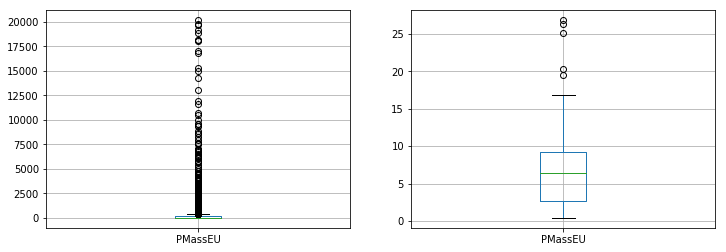

In [82]:
plt.figure(1,figsize=(12, 4))
plt.subplot(1,2,1)
exoplanet.boxplot(column='PMassEU')

plt.subplot(1,2,2)
exoplanet_hab.boxplot(column='PMassEU')

plt.show()

In [55]:
exoplanet_hab.PMassEU.quantile([.25, .5,.75])

0.25    2.715
0.50    6.400
0.75    9.245
Name: PMassEU, dtype: float64

In [56]:
exoplanet.PMassEU.quantile([.25, .5,.75])

0.25      3.88
0.50     10.40
0.75    149.43
Name: PMassEU, dtype: float64

We can see that the interquantile for the exoplanets is between 3.88 and 149.43 EU (Earth Units), the median value is 10.4 EU and it has a lot of outliers. If we only look at the habitable exoplanets, its mass is less than 30 EU and the median value is 6.4. From this we can see that exoplanets tend to have more mass than our planet. 

My hypothesis about was that is easier to find larger planets rather than smaller. It seems that the answer is more complicated and intriguing: https://www.forbes.com/sites/startswithabang/2018/03/02/sorry-super-earth-fans-there-are-only-three-classes-of-planet/#7e0aba8d78c4.


Let's see the relationship between a planet mass and its radius. 

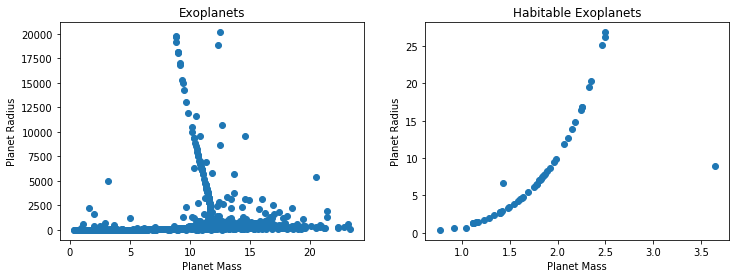

In [116]:
plt.figure(1,figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(exoplanet.PRadiusEU,exoplanet.PMassEU)
plt.ylabel('Planet Radius')
plt.xlabel('Planet Mass')
plt.title('Exoplanets')

plt.subplot(1,2,2)
plt.scatter(exoplanet_hab.PRadiusEU,exoplanet_hab.PMassEU)
plt.ylabel('Planet Radius')
plt.xlabel('Planet Mass')
plt.title('Habitable Exoplanets')
plt.show()

There is a clear quadratic pattern between planet radius and planet mass for habitable planet. I believe this is because the habitable planets tend to be more earth like. In order to validate this, let's create the same graph but colored by class of planet.

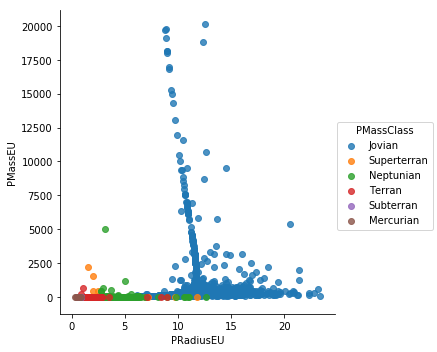

In [117]:
sns.lmplot( x="PRadiusEU", y="PMassEU", data=exoplanet, 
           fit_reg=False, hue='PMassClass', legend=True)
plt.title('Exoplanets')
plt.show()


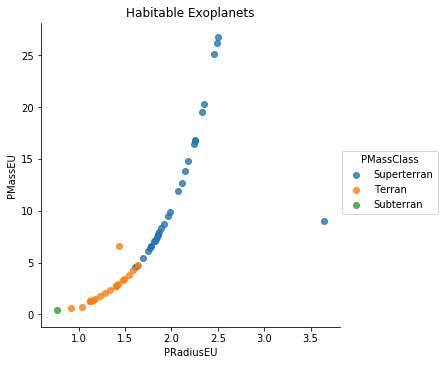

In [118]:
sns.lmplot( x="PRadiusEU", y="PMassEU", data=exoplanet_hab, fit_reg=False, 
           hue='PMassClass', legend=True)
plt.title('Habitable Exoplanets')
plt.show()

As we expected, the class is an important factor to understand the relation between mass and radius. The jovian class, which are a gas giant like Jupyter and Saturn, tend to have more mass and a bigger radius than the other classes.

Let's see the different classes of planets that are out there.

In [119]:
mass_class = exoplanet.PMassClass.value_counts()
mass_class_hab = exoplanet_hab.PMassClass.value_counts()

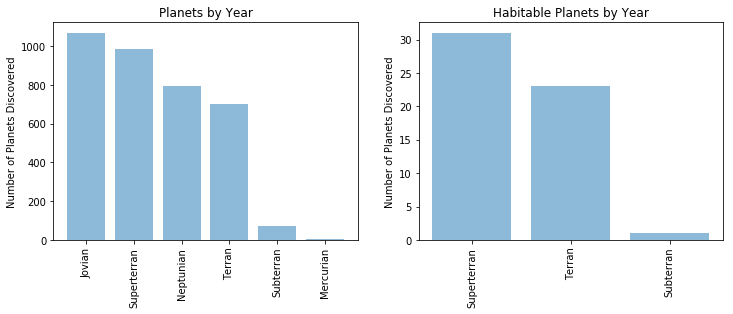

In [122]:
plt.figure(1,figsize=(12, 4))
plt.subplot(1,2,1)
plt.bar(mass_class.index, mass_class.values, align='center', alpha=0.5)
plt.xticks(mass_class.index, rotation='vertical')
plt.ylabel('Number of Planets Discovered')
plt.title('Planets by Year')

plt.subplot(1,2,2)
plt.bar(mass_class_hab.index, mass_class_hab.values, align='center', alpha=0.5)
plt.xticks(mass_class_hab.index, rotation='vertical')
plt.ylabel('Number of Planets Discovered')
plt.title('Habitable Planets by Year')

plt.show()

The most common exoplanet is the jovian and the most uncommon is a mercurian. 

The habitable belong to the terrestrial planets, which mean they have a rocky composition. The subcategories are:

1. 0.1-0.5 Earth masses = subterran
2. 0.5-2 Earth masses = terran (Earths)
3. 2-10 Earth masses = superterran (super-Earths)

This again, confirmed the fact that there are more habitable exoplanets with more mass than our own planet.